# 8 - Simulating Specific Frequencies

This example covers how we change the frequency range and sampling we consider when using MPT-Calculator.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path=r'C:\Users\James\Desktop\MPT-Calculator/'
os.chdir(Your_Path)
os.getcwd()

'C:\\Users\\James\\Desktop\\MPT-Calculator'

## Defining a range of frequencies:
By default MPT-Calculator considers frequecies from $10^1$ rad/s to $10^8$ rad/s in 40 logarithmically spaced points.
This can be changed by specifying the starting exponent (e.g. 1), the finishing exponent (e.g. 8), and the number of samples used in the frequency sweep. These are provided to the function as an optional tuple argument in the form
```python
main(start_stop=(Start,Finish,Points))
```
As an example specifying
```python
main(start_stop=(3,6,10))
```
will run a frequency sweep from $10^3$ rad/s to $10^6$ rad/s in 10 logarithmically spaced points.

sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592
[0, 1] 2 ['air', 'sphere']


C:\Users\James\Desktop\MPT-Calculator\main.py:279: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 Running as parallel full sweep
 mesh contains 7592 elements
Running Bilinear Forms Check
Mesh curve order set to:  5
K: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = K.mat.COO()


K: Iteration 2: bonus_intord = 4
K: Iteration 3: bonus_intord = 6
K: Iteration 4: bonus_intord = 8
K Bilinear Form Converged using order 10
C: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = A.mat.COO()


C: Iteration 2: bonus_intord = 4
C: Iteration 3: bonus_intord = 6
C: Iteration 4: bonus_intord = 8
C Bilinear Form Converged using order 10


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.59s/it]


Frequency Sweep complete
 Computing coefficients


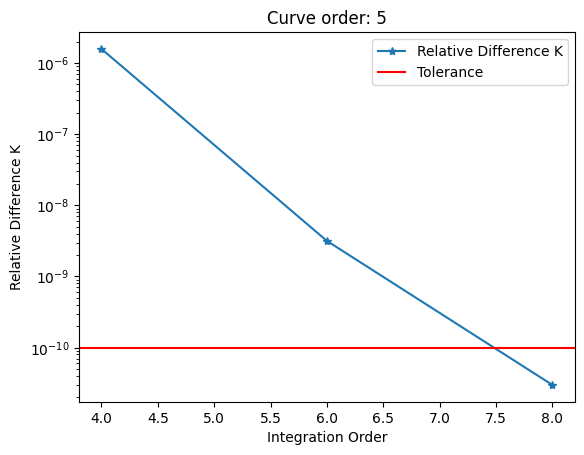

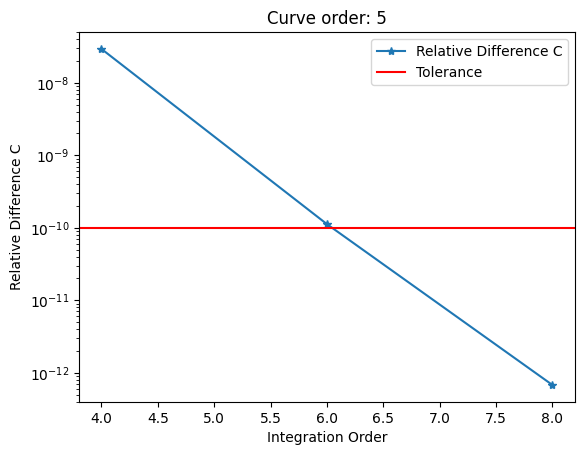

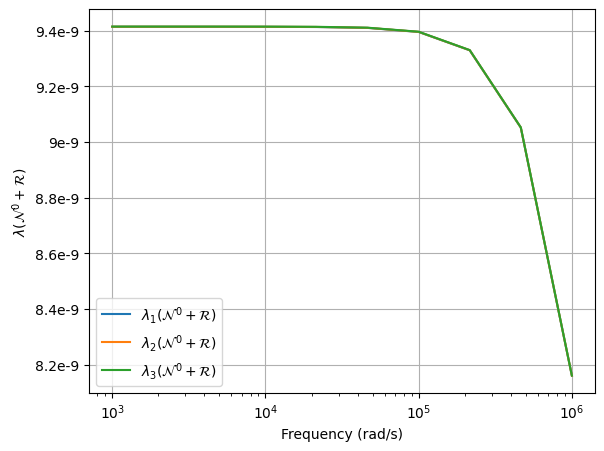

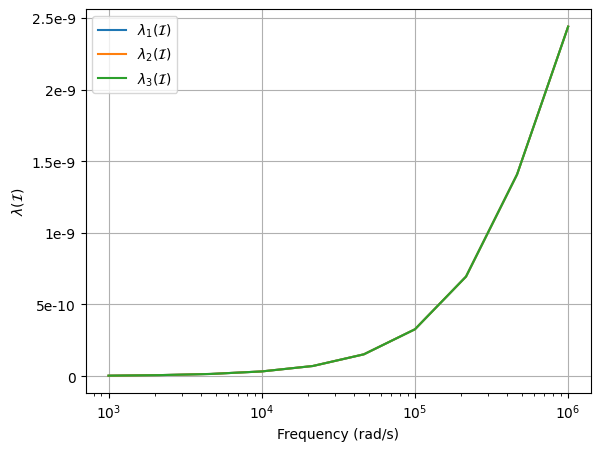

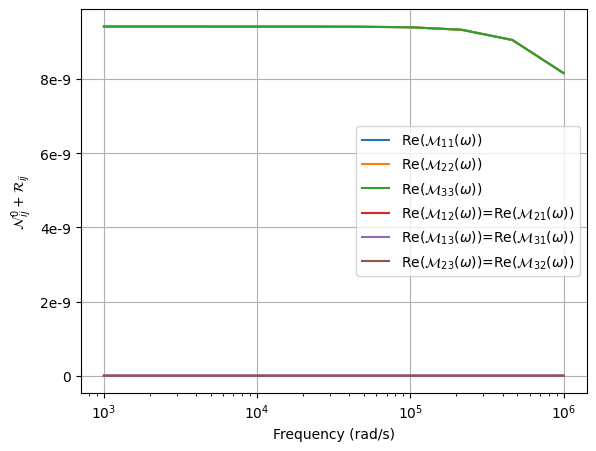

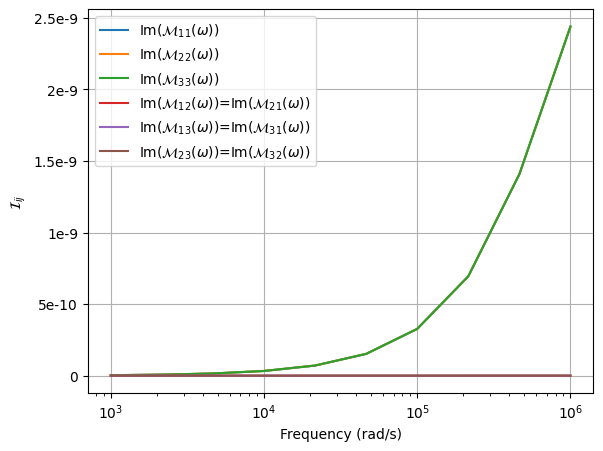

In [2]:
from main import main;
main(start_stop=(3,6,10));

## Simulating Specific Frequencies:
We can also specify an specific frequencies to be used via the $\texttt{frequency_array}$ option. Using this, we can specify a non-logarithmically spaced set of frequencies to be evaluated.


sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592
[0, 1] 2 ['air', 'sphere']


C:\Users\James\Desktop\MPT-Calculator\main.py:279: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 Running as parallel full sweep
 mesh contains 7592 elements
Running Bilinear Forms Check
Mesh curve order set to:  5
K: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = K.mat.COO()


K: Iteration 2: bonus_intord = 4
K: Iteration 3: bonus_intord = 6
K: Iteration 4: bonus_intord = 8
K Bilinear Form Converged using order 10
C: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = A.mat.COO()


C: Iteration 2: bonus_intord = 4
C: Iteration 3: bonus_intord = 6
C: Iteration 4: bonus_intord = 8
C Bilinear Form Converged using order 10


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.01s/it]


Frequency Sweep complete
 Computing coefficients


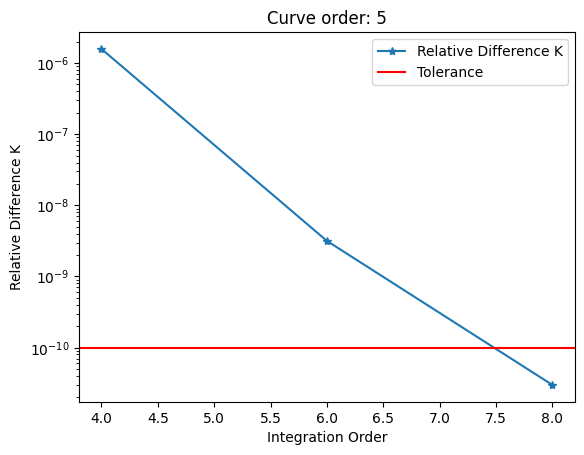

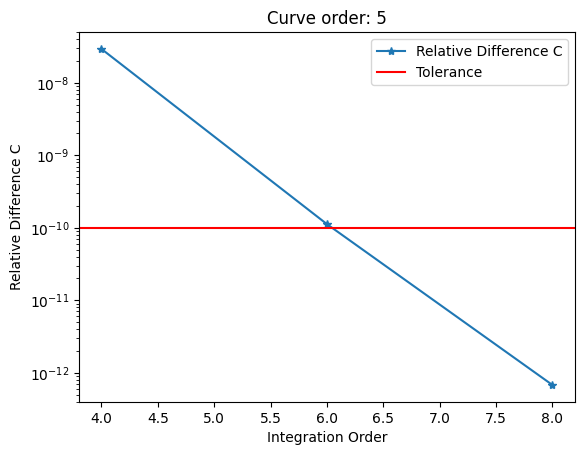

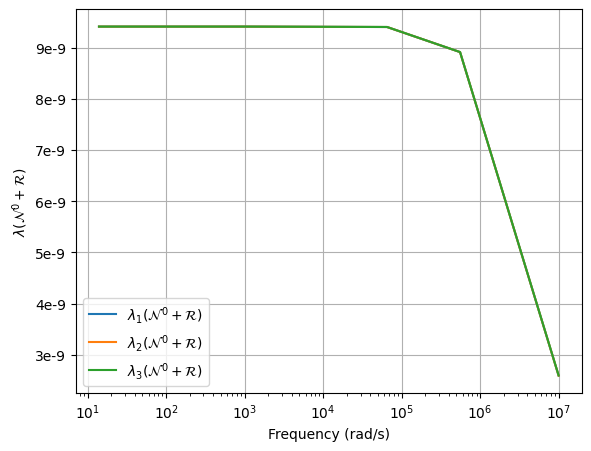

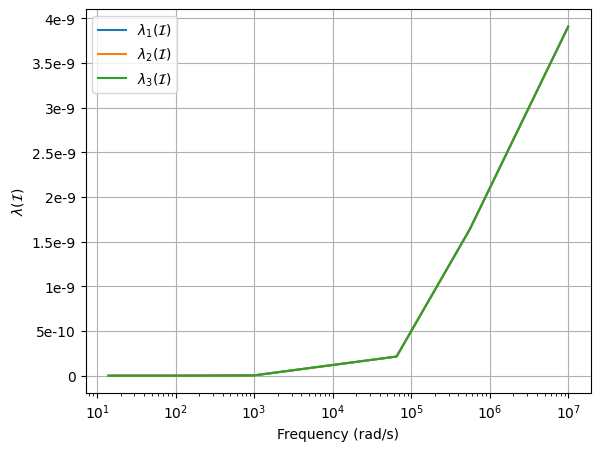

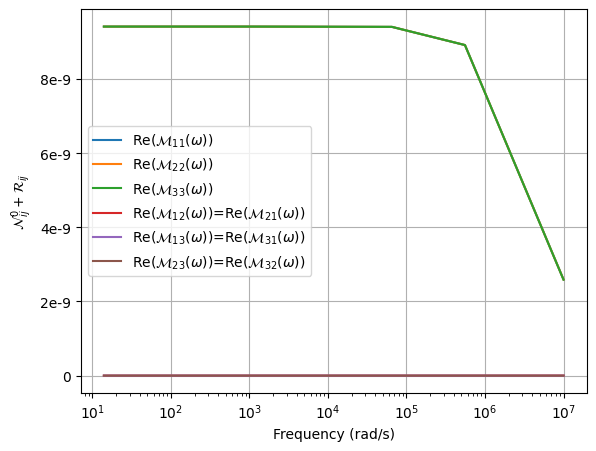

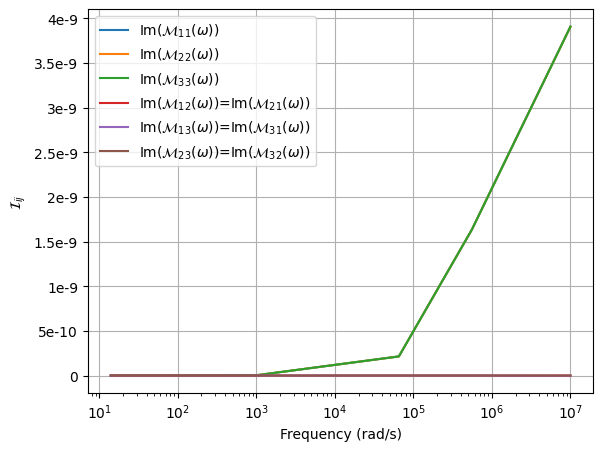

In [3]:
frequencies = [14, 15, 76, 207, 1003, 65311, 555555, 10**7];
main(frequency_array=frequencies);

## POD

Unlike the $\texttt{start_stop}$ argument, the $\texttt{frequency_array}$ argument does not alter the frequency snapshots used by the POD option, only the evaluation points.

When using the POD option, $\texttt{start_stop}$ would define the limits of the POD snapshots, and $\texttt{frequency_array}$ would define the evaluation frequencies. For example
```python
main(start_stop=(3,6,10), frequency_array=frequencies, use_POD=True)
```
would specify a range of POD frequency snapshots between $10^3$ rad/s and $10^6$ rad/s. The number of snapshots is set by Settings.py not by the "10" argument to start_stop. The reduced order model would then be evaluated only at the frequencies defined by $\texttt{frequencies}$. However, if the interest is only in a very small number of frequencies it would be better to not use POD and just to compute full order solutions at those frequencies. POD is best suited when a large number of outputs is desired as these can be obtained from a small number of full order snapshot solutions.

In [ ]:
main(start_stop=(3,6,40),frequency_array=frequencies, use_POD=True);

sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592
[0, 1] 2 ['air', 'sphere']
Running as parallel POD


C:\Users\James\Desktop\MPT-Calculator\main.py:279: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 7592 elements
Running Bilinear Forms Check
Mesh curve order set to:  5
K: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = K.mat.COO()


K: Iteration 2: bonus_intord = 4
K: Iteration 3: bonus_intord = 6
K: Iteration 4: bonus_intord = 8
K Bilinear Form Converged using order 10
C: Iteration 1: bonus_intord = 2


C:\Users\James\Desktop\MPT-Calculator\Functions\PrerunChecks\BilinearForms_Check.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  rows[:], cols[:], vals[:] = A.mat.COO()


C: Iteration 2: bonus_intord = 4
C: Iteration 3: bonus_intord = 6
C: Iteration 4: bonus_intord = 8
C Bilinear Form Converged using order 10


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [01:50<00:00,  8.47s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 12


## Single Frequency Solve
Specifiying $\texttt{frequency_array}$ as an array on length 1 will run MPT-Calculator in single frequency mode. For example
```python
main(geometry='OCC_step_cube.py', order=3, use_parallel=True, use_OCC=True, frequency_array=[1e6])
```
will run MPT-Calculator for an order 3 simulation of the OCC_step_cube geometry that was discussed in Tutorial [6](./6_Generating_mesh_from_step_file.ipynb) for the single frequency of $1\times 10^6$ rad/s. Naturally, this is significantly quicker than running a full frequency sweep and does not require POD, however the MPT at a single frequency does not provide the same richness of information and would not be unique to the object in question.

The saved results for the single frequency mode of MPT-Calculator follow a (slightly) different format to the full or POD frequency sweeps. For the OCC_step_cube geometry, this would follow
```bash
Results\OCC_step_cube\al_0.001_mu_1_sig_1e6\om_1e6_el_19533_ord_3
```
where the subdirectories correspond to
- The cube problem that has been solved
- The object size and materials ($\alpha=0.001$ m, $\mu_r=1$, $\sigma_* = 1\times 10^6$ S/m,) by al_0.001_mu_1_sig_1e6
- The frequency under test, the total number of elements in the mesh, and the order of elements ($1\times 10^6$ rad/s, 19533, and 3) by om_1e6_el_19533_ord_3

Similarly to the full order and POD solves, the directory contains a $\texttt{/Data}$ folder, and an $\texttt{Input_files}$ folder. Note that when considering a single frequency no figures are produced.

The $\texttt{\Data}$ folder contains the following:
 - $\texttt{MPT.csv}$ - The 3x3 complex MPT tensor coefficients stored as complex numbers.
 - $\texttt{Invariants.csv}$ - A complex $1 \times 3$ array containing each of the invariants for the frequency in question. Note that each the entries are stored in the form of $I_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_1 ({\mathcal I}), \ldots,  I_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} I_3 ({\mathcal I})$ and $I_1 = \lambda_1 + \lambda_2 + \lambda_3$, $I_2 = \lambda_1 \lambda_2 + \lambda_2 \lambda_3 + \lambda_3 \lambda_1$ and $I_3 = \lambda_1 \lambda_2 \lambda_3$. 
 - $\texttt{Eigenvalues.csv}$ - A complex $N \times 3$ array containing each of the eigenvalues for each frequency. Note that each the entries are stored in the form of $\lambda_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_1 ({\mathcal I}), \ldots,  \lambda_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_3 ({\mathcal I})$ and the eigenvalues are sorted in ascending order. Also recall that ${\mathcal M}(\omega) =  {\mathcal N}^0 +{\mathcal R}(\omega)  + \rm{i} {\mathcal I}(\omega)$.
 - $\texttt{N0.csv}$ - The 3x3 real tensor coefficients for $\mathcal{N}^0$.
 
In the case where $\texttt{EddyCurrentTest = True}$ in $\texttt{Settings.py}$ then the additional output is also saved
 - $\texttt{Eddy-current_breakdown.txt}$ - The frequency (rad/s) corresponding to the approximate limit of validity for the eddy current model. 
 
The $\texttt{/Input_files}$ directory is the same as the folder generated for full and POD sweeps. 

## VTK Output
The single frequency mode of MPT-Calculator can be used to generate $\texttt{.vtk}$ visualisation file outputs, which can then be loaded in to visualisation software, such as Paraview, in order to examine the real and imaginary field magnitudes of the eddy currents. To output a $\texttt{.vtk}$ file we set $\texttt{vtk_output=True}$ in the Settings file.
```python
#Produce a vtk outputfile for the eddy-currents (outputs a large file!)
vtk_output = True
#(boolean) do you want to produce a vtk file of the eddy currents in the
#object (single frequency only)

#Refine the vtk output (extremely large file!)
Refine_vtk = False
#(boolean) do you want ngsolve to refine the solution before exporting
#to the vtk file (single frequency only)
#(not compatable with all NGSolve versions)
```

The output $\texttt{.vtk}$ file will be stored seperately in the $\texttt{Results/vtk_output/}$ folder under the object geometry name and the frequency in question. E.g.
```bash
Results\OCC_step_cube\al_0.001_mu_1_sig_1e6\om_1e6_el_19533_ord_3\Data
```
 <img src="Figures/OCC_step_cube_VTK.PNG" alt="isolated" width="400"/>